In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [2]:
#! pip install statannot

In [3]:
from statannot import add_stat_annotation

# Загрузка датафреймов

In [4]:
snp_df = pd.read_csv('SNPs_per_100_kb.tsv', sep='\t')
#snp_df

In [5]:
cov_dep_df = pd.read_csv('Coverage_per_100kb.tsv', sep='\t')
cov_dep_df.drop(['numreads','covbases','meanbaseq','meanmapq'], axis=1, inplace=True)
#cov_dep_df

In [6]:
cov_dep_snp_df = cov_dep_df
cov_dep_snp_df['SNP'] = snp_df.SNP_COUNT
cov_dep_snp_df

,chromosome,startpos,endpos,coverage,meandepth,SNP
0,1,1,100000,83.7490,23.2342,46
1,1,100000,200000,87.9541,23.9362,10
2,1,200000,300000,83.8532,23.2665,4
3,1,300000,400000,89.0121,24.8606,28
4,1,400000,500000,85.4051,24.1263,12
...,...,...,...,...,...,...
25735,19,172600000,172700000,89.2131,73.3036,87
25736,19,172700000,172800000,85.8891,11.6635,16
25737,19,172800000,172900000,92.2221,12.8506,9
25738,19,172900000,173000000,97.3400,16.7530,184


In [11]:
cov_dep_snp_df['Pos_type'] = ['Inversion' if ((x.startpos >= inv_start) and (x.endpos <= inv_end)) 
                              and (x.chromosome == 11) else 'Rest_Chromosome' if x.chromosome == 11 
                              else 'Rest_Genome' for _, x in cov_dep_snp_df.iterrows()]

In [12]:
cov_dep_snp_df

,chromosome,startpos,endpos,coverage,meandepth,SNP,Pos_type
0,1,1,100000,83.7490,23.2342,46,Rest_Genome
1,1,100000,200000,87.9541,23.9362,10,Rest_Genome
2,1,200000,300000,83.8532,23.2665,4,Rest_Genome
3,1,300000,400000,89.0121,24.8606,28,Rest_Genome
4,1,400000,500000,85.4051,24.1263,12,Rest_Genome
...,...,...,...,...,...,...,...
25735,19,172600000,172700000,89.2131,73.3036,87,Rest_Genome
25736,19,172700000,172800000,85.8891,11.6635,16,Rest_Genome
25737,19,172800000,172900000,92.2221,12.8506,9,Rest_Genome
25738,19,172900000,173000000,97.3400,16.7530,184,Rest_Genome


## Создание дополнительных датафреймов

In [10]:
inv_start = 61235947
inv_end = 96142211

In [13]:
cov_dep_snp_df_11 = cov_dep_snp_df[cov_dep_snp_df.chromosome == 11]
cov_dep_snp_df_11_inv = cov_dep_snp_df_11[(cov_dep_snp_df_11.startpos >= inv_start) & (cov_dep_snp_df_11.endpos <= inv_end)]
cov_dep_snp_df_11_wo_inv = cov_dep_snp_df_11[~((cov_dep_snp_df_11.startpos >= inv_start) & (cov_dep_snp_df_11.endpos <= inv_end))]
cov_dep_snp_df_whole_genomve_wo_inv = cov_dep_snp_df[(cov_dep_snp_df.chromosome != 11) | ~((cov_dep_snp_df_11.startpos >= inv_start) & (cov_dep_snp_df_11.endpos <= inv_end))]

In [14]:
cov_dep_snp_df_11.shape[0] == cov_dep_snp_df_11_wo_inv.shape[0] + cov_dep_snp_df_11_inv.shape[0] 

True

In [15]:
cov_dep_snp_df.shape[0] == cov_dep_snp_df_whole_genomve_wo_inv.shape[0] + cov_dep_snp_df_11_inv.shape[0]

True

# Построение графиков

## Снипы + покрытие на 11 хромосоме

Text(0, 0.5, 'Coverage (blue)')

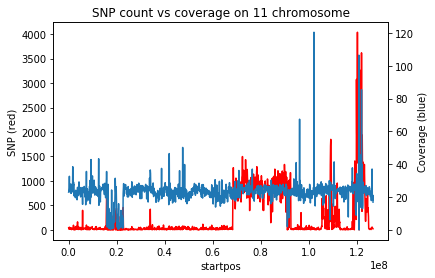

In [16]:
ax = sns.lineplot(data=cov_dep_snp_df_11, x = 'startpos', y = 'SNP', color="r")
ax2 = ax.twinx()
sns.lineplot(data=cov_dep_snp_df_11, x = 'startpos', y = 'meandepth', ax=ax2, legend=False)

ax.set_title('SNP count vs coverage on 11 chromosome')
ax.set_ylabel('SNP (red)')
ax2.set_ylabel('Coverage (blue)')

Text(0, 0.5, 'Mean depth (blue)')

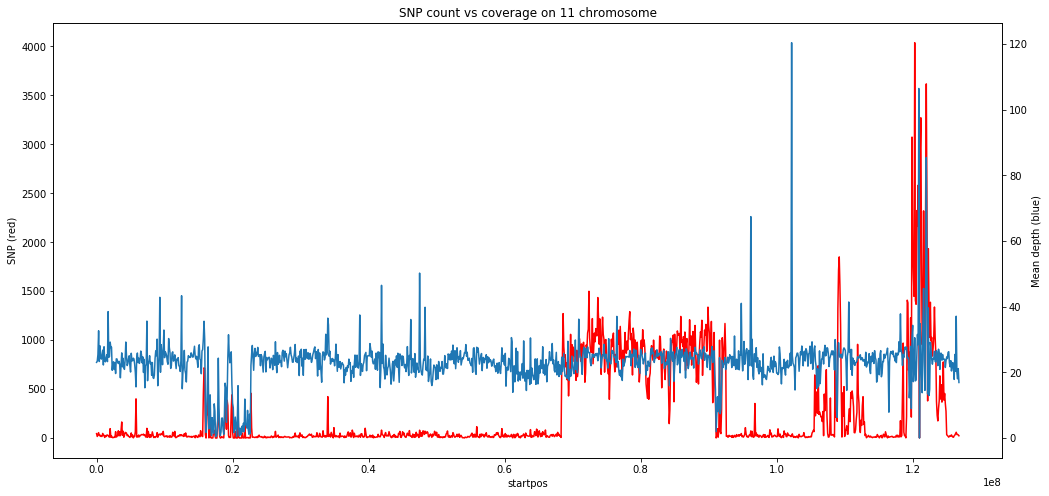

In [92]:
ax = sns.lineplot(data=cov_dep_snp_df_11, x = 'startpos', y = 'SNP', color="r")
ax2 = ax.twinx()
sns.lineplot(data=cov_dep_snp_df_11, x = 'startpos', y = 'meandepth', ax=ax2, legend=False)

ax.set_title('SNP count vs coverage on 11 chromosome')
ax.set_ylabel('SNP (red)')
ax2.set_ylabel('Mean depth (blue)')

## Снипы + поыкрытие по всему геному

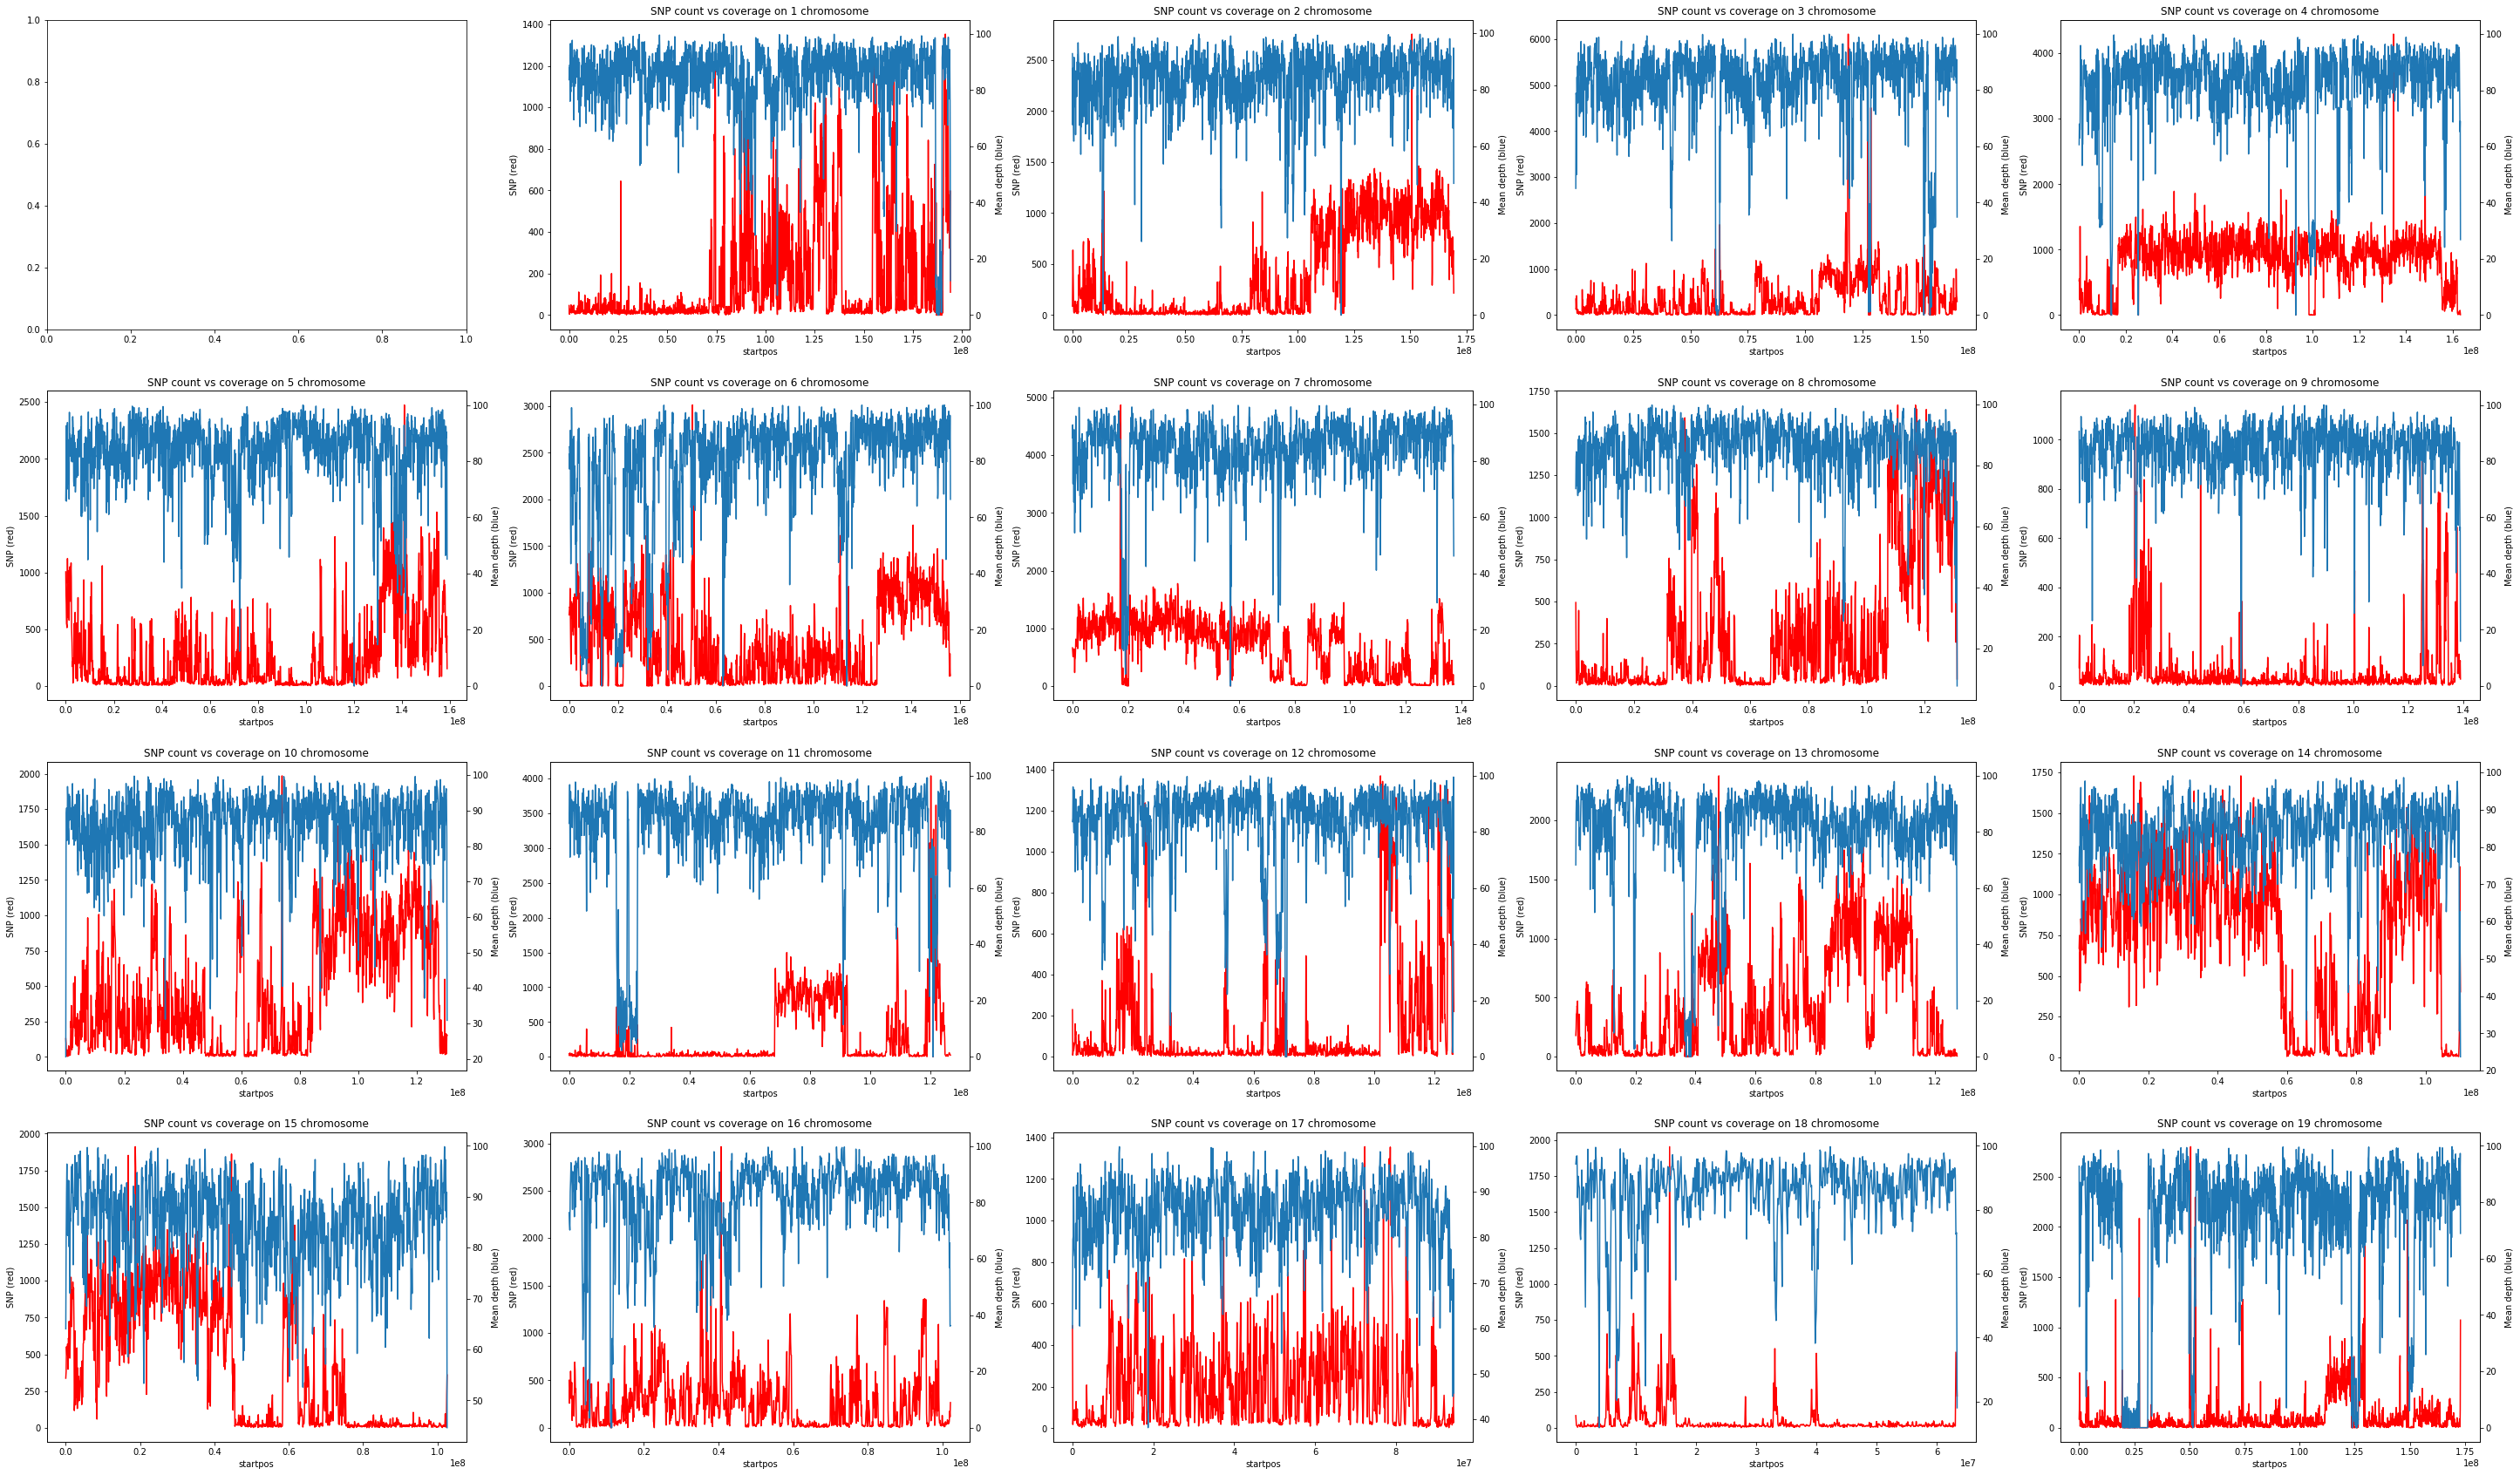

In [145]:
plt.rcParams['figure.figsize']=[50, 30]
fig, axs = plt.subplots(nrows= 4, ncols=5)

for i in range(1,20):
    ax = sns.lineplot(data=cov_dep_snp_df[cov_dep_snp_df.chromosome == i], x = 'startpos', y = 'SNP', color="r", ax = axs[i//5][i%5])
    ax2 = axs[i//5][i%5].twinx()
    sns.lineplot(data=cov_dep_snp_df[cov_dep_snp_df.chromosome == i], x = 'startpos', y = 'coverage', ax=ax2, legend=False)
    ax.set_title(f'SNP count vs coverage on {i} chromosome')
    ax.set_ylabel('SNP (red)')
    ax2.set_ylabel('Mean depth (blue)')

# Проверка распределения на нормальность 

In [82]:
shapiro_test = stats.shapiro(cov_dep_snp_df.SNP)
print(f'Вероятность получить такие результаты, если данные SNP распределены нормально, равняется {shapiro_test[1]}')

shapiro_test = stats.shapiro(cov_dep_snp_df.coverage)
print(f'Вероятность получить такие результаты, если данные coverage распределены нормально, равняется {shapiro_test[1]}')

shapiro_test = stats.shapiro(cov_dep_snp_df.meandepth)
print(f'Вероятность получить такие результаты, если данные meandepth распределены нормально, равняется {shapiro_test[1]}')

Вероятность получить такие результаты, если данные SNP распределены нормально, равняется 0.0
Вероятность получить такие результаты, если данные coverage распределены нормально, равняется 0.0
Вероятность получить такие результаты, если данные meandepth распределены нормально, равняется 0.0


D:\programms\bioinformatics\PYTHON\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [83]:
scipy.stats.normaltest(cov_dep_snp_df.SNP)

NormaltestResult(statistic=8146.829446811982, pvalue=0.0)

In [84]:
scipy.stats.normaltest(cov_dep_snp_df.coverage)

NormaltestResult(statistic=16074.15265632232, pvalue=0.0)

In [85]:
scipy.stats.normaltest(cov_dep_snp_df.meandepth)

NormaltestResult(statistic=50808.703271580736, pvalue=0.0)

### QQ Plot

In [130]:
df_pct = pd.DataFrame()
df_pct['q_snp'] = np.percentile(cov_dep_snp_df.SNP, range(100))
df_pct['q_coverage'] = np.percentile(cov_dep_snp_df.coverage, range(100))

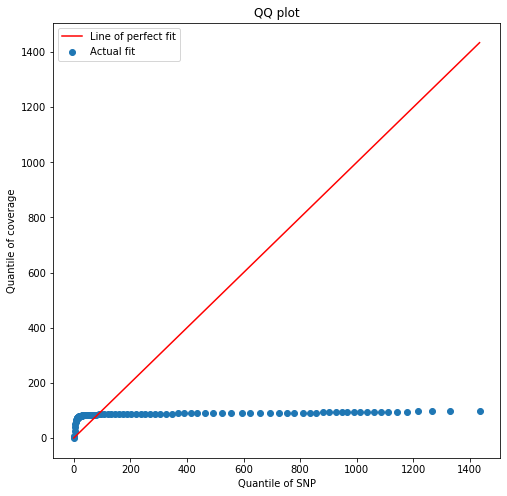

In [131]:
plt.figure(figsize=(8, 8))
plt.scatter(x='q_snp', y='q_coverage', data=df_pct, label='Actual fit');
sns.lineplot(x='q_snp', y='q_snp', data=df_pct, color='r', label='Line of perfect fit');
plt.xlabel('Quantile of SNP')
plt.ylabel('Quantile of coverage')
plt.legend()
plt.title("QQ plot");

# Анализ корреляции

In [107]:
corr_SNP_cov = stats.spearmanr(cov_dep_snp_df.coverage,cov_dep_snp_df.SNP)
corr_SNP_dep = stats.spearmanr(cov_dep_snp_df.meandepth,cov_dep_snp_df.SNP)
print(f'Коэф. корреляции Спирмена между количеством снипов и покрытием равняется {corr_SNP_cov[0]:.4f}, с p-value = {corr_SNP_cov[1]:.7f}') 
print(f'Коэф. корреляции Спирмена между количеством снипов и глубиной прочтения равняется {corr_SNP_dep[0]:.4f}, с p-value = {corr_SNP_dep[1]:.7f}')

Коэф. корреляции Спирмена между количеством снипов и покрытием равняется 0.0208, с p-value = 0.0008461
Коэф. корреляции Спирмена между количеством снипов и глубиной прочтения равняется 0.1255, с p-value = 0.0000000


In [108]:
corr_SNP_cov = stats.pearsonr(cov_dep_snp_df.coverage,cov_dep_snp_df.SNP)
corr_SNP_dep = stats.pearsonr(cov_dep_snp_df.meandepth,cov_dep_snp_df.SNP)
print(f'Коэф. корреляции Пирсона между количеством снипов и покрытием равняется {corr_SNP_cov[0]:.4f}, с p-value = {corr_SNP_cov[1]:.7f}') 
print(f'Коэф. корреляции Пирсона между количеством снипов и глубиной прочтения равняется {corr_SNP_dep[0]:.4f}, с p-value = {corr_SNP_dep[1]:.7f}')

Коэф. корреляции Пирсона между количеством снипов и покрытием равняется 0.1008, с p-value = 0.0000000
Коэф. корреляции Пирсона между количеством снипов и глубиной прочтения равняется 0.1317, с p-value = 0.0000000


Данные распределены не нормально, поэтому нужно использовать коэффициент корреляции Спирмена

Если использовать коээфициент корреляции Пирсона, будет ошибочно более значимая корреляция

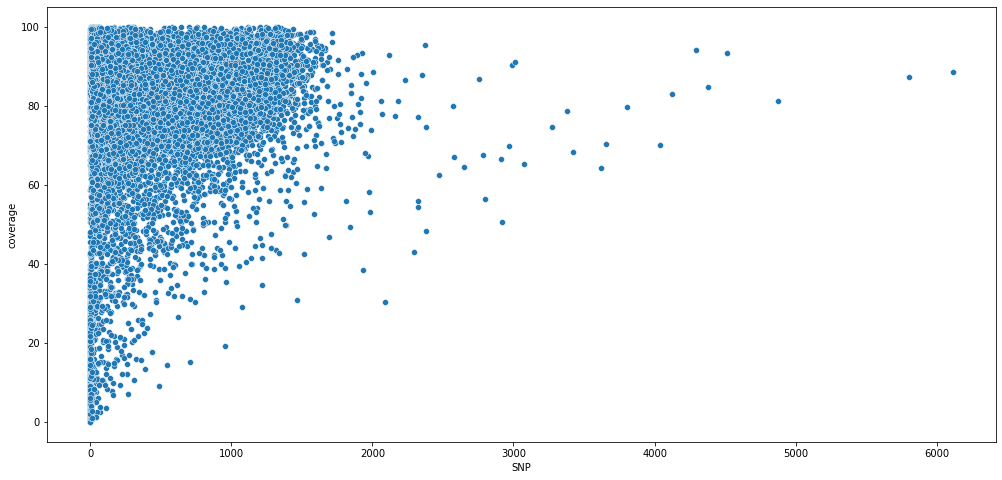

In [94]:
sns.scatterplot(x="SNP", y="coverage", data=cov_dep_snp_df)

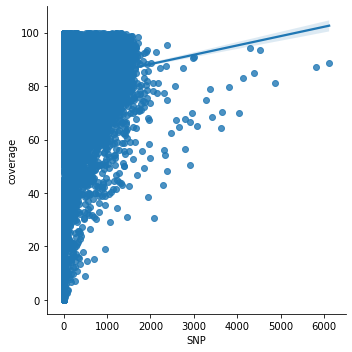

In [97]:
sns.lmplot(x="SNP", y="coverage", data=cov_dep_snp_df)

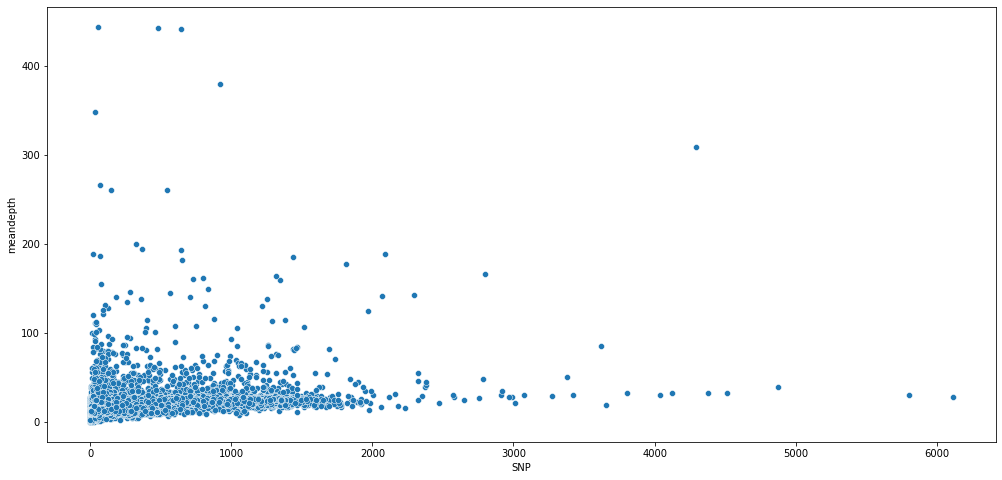

In [95]:
sns.scatterplot(x="SNP", y="meandepth", data=cov_dep_snp_df)

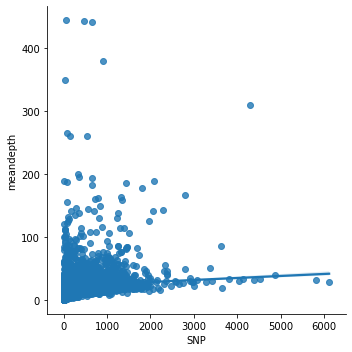

In [96]:
sns.lmplot(x="SNP", y="meandepth", data=cov_dep_snp_df)

# Анализ участка инверсии

In [118]:
inv_vs_rest_chrom = stats.mannwhitneyu(cov_dep_snp_df_11_inv.SNP,cov_dep_snp_df_11_wo_inv.SNP)
inv_vs_rest_genom = stats.mannwhitneyu(cov_dep_snp_df_11_inv.SNP,cov_dep_snp_df_whole_genomve_wo_inv.SNP)
print(inv_vs_rest_chrom)
print(inv_vs_rest_genom)

MannwhitneyuResult(statistic=60672.0, pvalue=7.423401933659887e-66)
MannwhitneyuResult(statistic=3101362.5, pvalue=5.609708925808729e-22)


In [122]:
print(f'Согласно тесту Манна-Уитни, вероятность получить такие результаты, если количество снипов в участке инверсии и остальном участке хомосомы не отличается, равняется {inv_vs_rest_chrom[1]}')

print(f'Согласно тесту Манна-Уитни, вероятность получить такие результаты, если количество снипов в участке инверсии и остальном геноме не отличается, равняется {inv_vs_rest_genom[1]}')

Согласно тесту Манна-Уитни, вероятность получить такие результаты, если количество снипов в участке инверсии и остальном участке хомосомы не отличается, равняется 7.423401933659887e-66
Согласно тесту Манна-Уитни, вероятность получить такие результаты, если количество снипов в участке инверсии и остальном геноме не отличается, равняется 5.609708925808729e-22


In [127]:
print(f'Среднее количество снипов в участке инверсии равняется {cov_dep_snp_df_11_inv.SNP.mean():.2f}')
print(f'Среднее количество снипов в остальном участке хромосомы равняется {cov_dep_snp_df_11_wo_inv.SNP.mean():.2f}')
print(f'Среднее количество снипов в остальном участке генома равняется {cov_dep_snp_df_whole_genomve_wo_inv.SNP.mean():.2f}')

Среднее количество снипов в участке инверсии равняется 604.64
Среднее количество снипов в остальном участке хромосомы равняется 135.74
Среднее количество снипов в остальном участке генома равняется 350.51


(<matplotlib.axes._subplots.AxesSubplot at 0x1c82da40860>,
  <statannot.StatResult.StatResult at 0x1c82ffb9e10>])

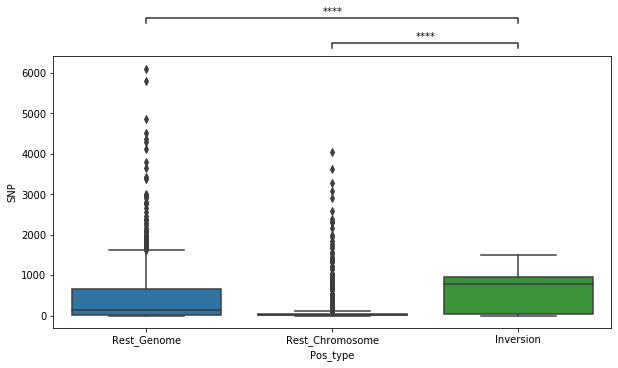

In [177]:
plt.rcParams['figure.figsize']=[10, 5]
ax = sns.boxplot(data=cov_dep_snp_df, x="Pos_type", y="SNP")

add_stat_annotation(ax, data=cov_dep_snp_df, x="Pos_type", y="SNP",
                    box_pairs=[("Inversion", "Rest_Chromosome"), ("Inversion", "Rest_Genome")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=0)